In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff

from rfpop import rfpop, get_breakpoints

In [2]:
path = "C:\Jeremie\MVA\Machine learning for time series\EthanolConcentration\LOBOFolds\EthanolConcentration0_TRAIN.arff"

In [6]:
arff_file = arff.loadarff(path)
df = pd.DataFrame(arff_file[0])

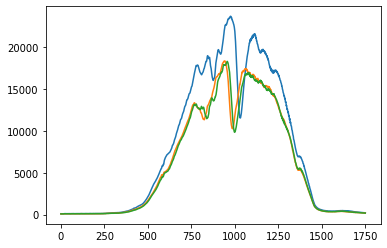

In [ ]:
plt.plot(list(df["relationalAtt"][0][0]))
plt.plot(list(df["relationalAtt"][0][1]))
plt.plot(list(df["relationalAtt"][0][2]))

In [61]:
y = np.array(list(df["relationalAtt"][0][0]))
y /= np.max(y)

100%|██████████| 1751/1751 [00:08<00:00, 211.57it/s]


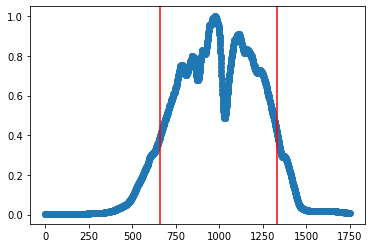

In [63]:
cp = rfpop(y, 0.5, 10, verbose=False)
taus = [elt[1] for elt in cp]

plt.figure()
bkpts = get_breakpoints(taus)
plt.scatter(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

## Household Electric Power Consumption (Kaggle)

In [64]:
path = "C:\Jeremie\MVA\Machine learning for time series\household_electric_power_consumption.txt"

In [65]:
# Open txt file with sep ; and one line of header
df = pd.read_csv(path, sep=";", header=0)

C:\Users\jerem\AppData\Local\Temp\ipykernel_10096\3882183955.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";", header=0)


In [ ]:
# Convert (date, time) to datetime
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
# Convert numeric columns to float
for col in ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

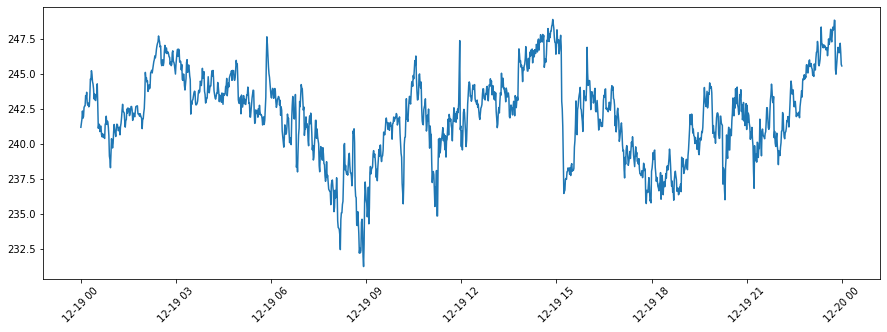

In [97]:
sub_df = df[(df["Datetime"] >= "2006-12-19") & (df["Datetime"] <= "2006-12-20")]
plt.figure(figsize=(15, 5))
plt.plot(sub_df["Datetime"], sub_df["Voltage"])
plt.xticks(rotation=45)
plt.show()

## Hole Deviation EDA (Kaggle)

In [103]:
path = "C:\Jeremie\MVA\Machine learning for time series\well_log.csv"
df = pd.read_csv(path, index_col=0)

In [106]:
df

,Depth,Gamma-ray,Shale_Volume,Restivity,Delta T,Vp,Vs,Density,Density_Calculated,Neuron_Porosity,Density_Porosity,Possions_Ratio,Classification
0,4000,73.215,0.7965,0.25,137.81,7256.3675,2799.0030,2.1278,2.1278,-999.25,0.2818,0.4126,0
1,4001,69.152,0.7391,0.20,138.06,7243.2276,2804.5841,2.1202,2.1202,-999.25,0.2893,0.4118,0
2,4002,65.965,0.6940,0.21,138.06,7243.2276,2817.0360,2.1149,2.1149,-999.25,0.2946,0.4109,0
3,4003,68.215,0.7258,0.27,137.31,7282.7908,2839.0723,2.1217,2.1217,-999.25,0.2889,0.4104,0
4,4004,70.840,0.7630,0.36,136.31,7336.2189,2870.3577,2.1301,2.1301,-999.25,0.2819,0.4096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,4296,55.637,0.5337,0.27,136.06,7349.6987,2945.4264,2.1044,2.1044,-999.25,0.3083,0.4043,0
297,4297,61.012,0.6164,0.34,130.81,7644.6755,3152.9818,2.1361,2.1361,-999.25,0.2847,0.3975,0
298,4298,40.105,0.2945,0.49,117.53,8508.4659,3934.4175,2.1579,2.1579,-999.25,0.2855,0.3640,1
299,4299,28.286,0.1124,0.65,110.53,9047.3175,4426.3291,2.1702,2.1702,-999.25,0.2859,0.3427,1


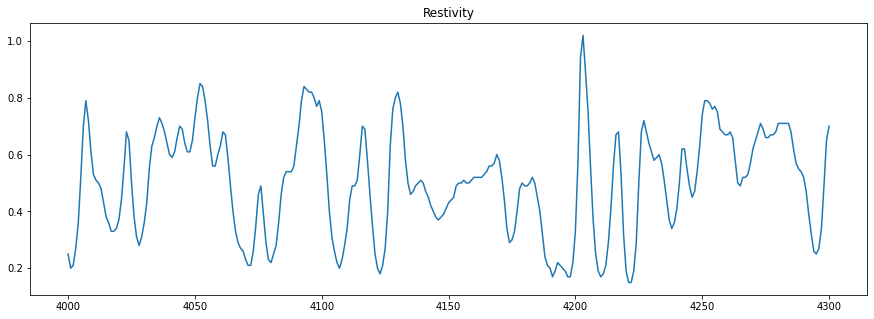

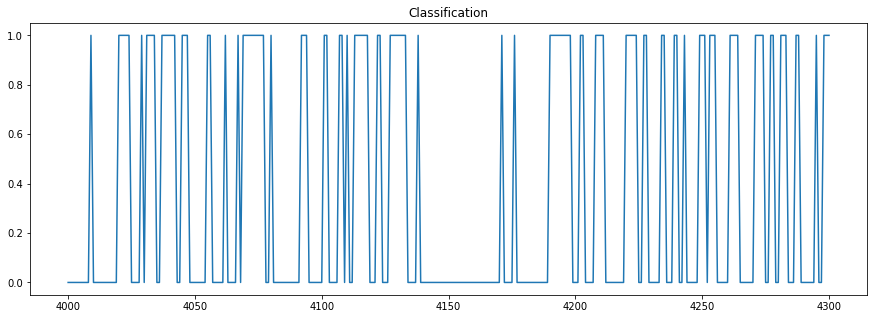

In [111]:
for col in ["Restivity", "Classification"]: # df.columns:
    plt.figure(figsize=(15, 5))
    plt.plot(df["Depth"], df[col])
    plt.title(col)
    plt.show()

## US Monthly Unemployment Rate 1948 - Present (Kaggle)

In [153]:
path = "C:\\Jeremie\\MVA\\Machine learning for time series\\USUnemployment.csv"

In [154]:
with open(path, "r") as f:
    lines = f.readlines()

t = []
y = []
for line in lines[1:]:
    line = line.strip().split(",")
    t.append(line[0])
    for elt in line[1:]:
        if elt != "":
            y.append(float(elt))

new_t = []
for year in t:
    for month in range(1, 13):
        new_t.append(f"{year}-{month:02d}")

new_t = pd.to_datetime(new_t)

100%|██████████| 864/864 [00:00<00:00, 1250.10it/s]


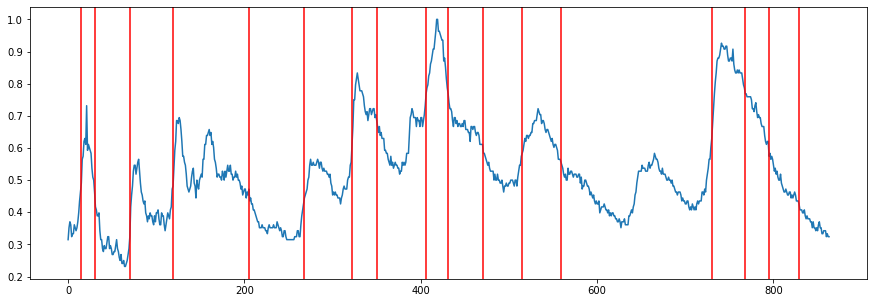

In [155]:
y = np.array(y)
y /= np.max(y)

cp = rfpop(y, 2.5, 0.2, verbose=False)
taus = [elt[1] for elt in cp]

plt.figure(figsize=(15, 5))
bkpts = get_breakpoints(taus)
plt.plot(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

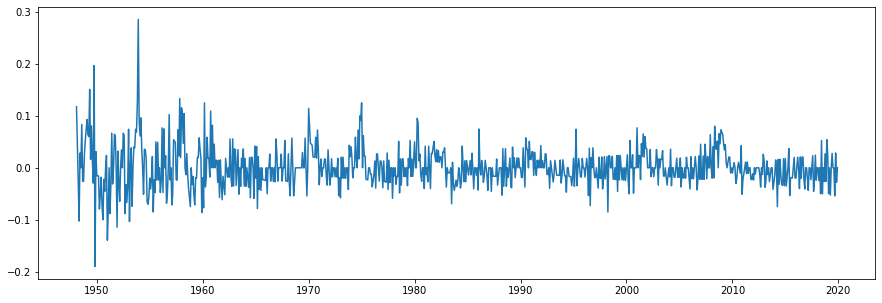

In [156]:
y_deriv = [(y[i+1] - y[i]) for i in range(len(y)-1)]
plt.figure(figsize=(15, 5))
plt.plot(new_t[1:], y_deriv)
plt.show()

## Ice core DML94C07_38 (Kaggle)

In [162]:
path = "C:\Jeremie\MVA\Machine learning for time series\DML94C07_38_monthly_Ca_NO3_dust.txt"

In [163]:
df = pd.read_csv(path, sep="\t", header=0)

In [165]:
# Convert to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [166]:
df

,Depth ice/snow [m],Age [ka BP],Age [a AD],Depth bot [m],Depth top [m],Ca2+ [ng/g],Dust [#/ml],[NO3]- [ng/g]
0,6.03,-0.054417,2004.4167,6.062,6.000,18.4,1077,18.0
1,6.11,-0.054333,2004.3333,6.160,6.062,13.5,443,20.7
2,6.21,-0.054250,2004.2500,6.255,6.160,14.4,235,17.9
3,6.30,-0.054167,2004.1667,6.349,6.255,13.8,113,7.7
4,6.39,-0.054083,2004.0833,6.441,6.349,9.9,112,23.9
...,...,...,...,...,...,...,...,...
504,79.58,-0.012417,1962.4167,79.628,79.523,7.3,54,10.8
505,79.68,-0.012333,1962.3333,79.731,79.628,7.8,48,8.9
506,79.78,-0.012250,1962.2500,79.833,79.731,8.0,56,11.4
507,79.88,-0.012167,1962.1667,79.934,79.833,9.0,69,15.1


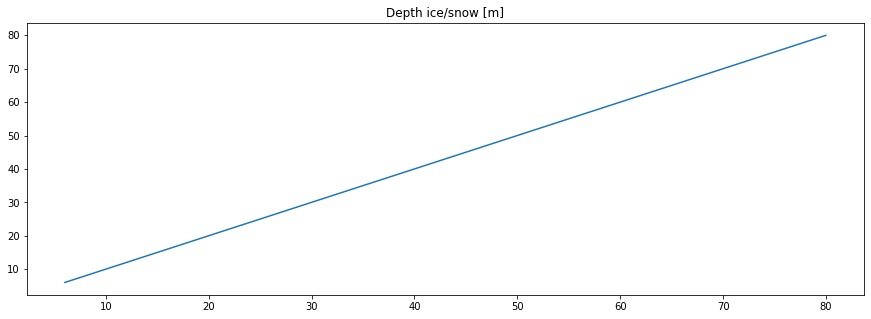

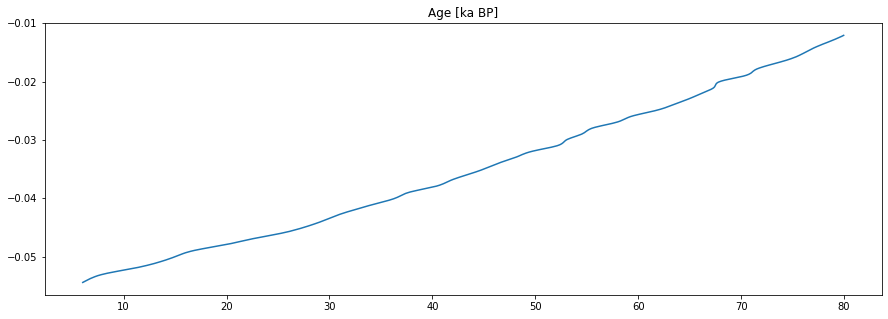

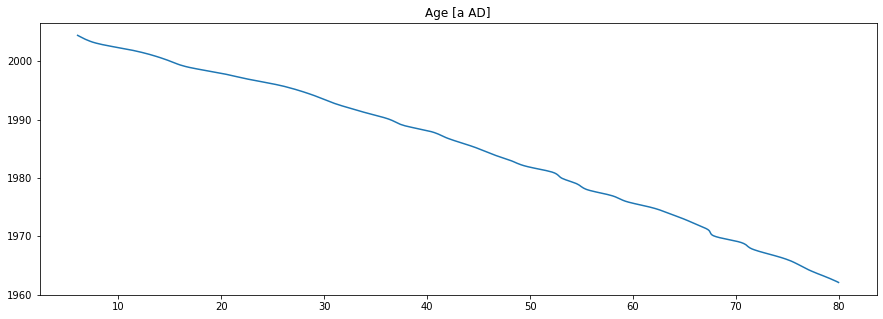

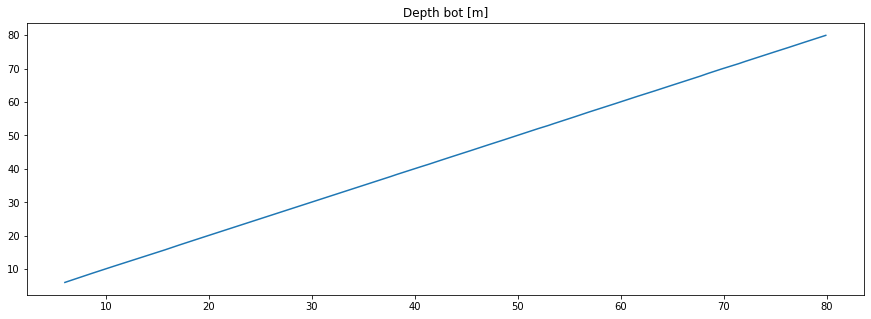

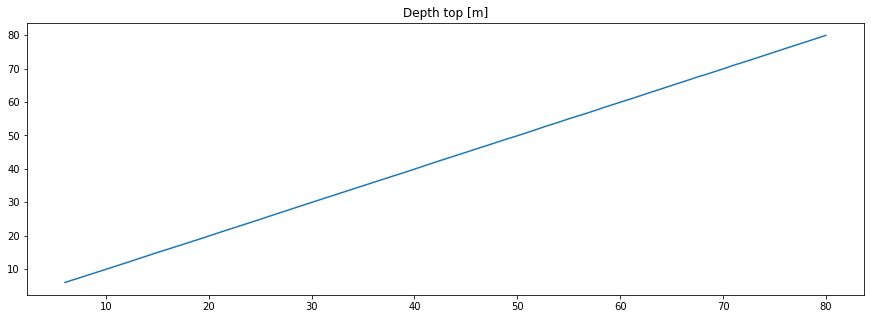

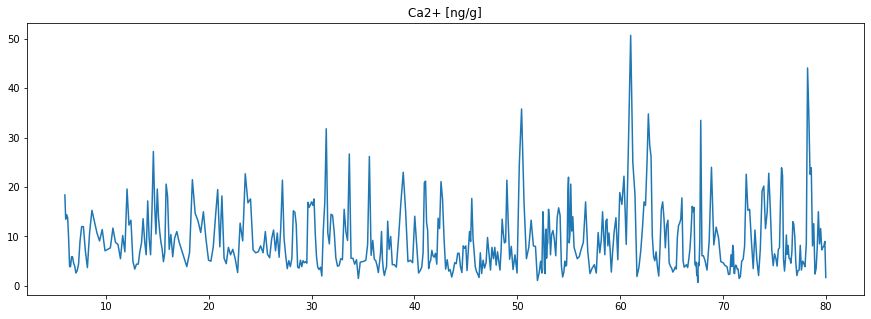

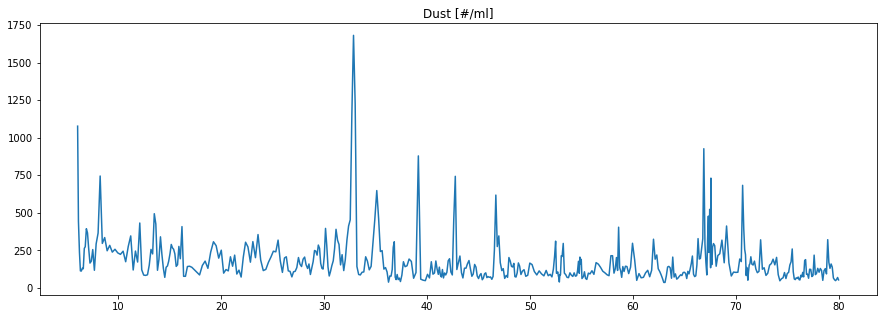

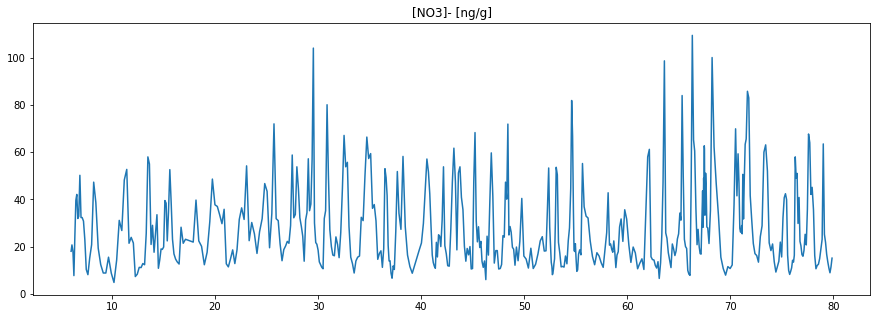

In [167]:
for col in df.columns:
    plt.figure(figsize=(15, 5))
    plt.plot(df["Depth ice/snow [m]"], df[col])
    plt.title(col)
    plt.show()

## French bakery daily sales

In [168]:
path = "C:\Jeremie\MVA\Bakery sales.csv"

In [181]:
df = pd.read_csv(path, header=0, index_col=0)

In [183]:
# Group by date and sum for BAGUETTE
baguette = df[df["article"] == "BAGUETTE"]
df = df.groupby("date").sum().reset_index()[["date", "Quantity"]]

In [188]:
df

,date,Quantity
0,2021-01-02,581.0
1,2021-01-03,564.0
2,2021-01-04,315.0
3,2021-01-05,309.0
4,2021-01-07,310.0
...,...,...
595,2022-09-26,399.0
596,2022-09-27,423.0
597,2022-09-28,357.0
598,2022-09-29,428.0


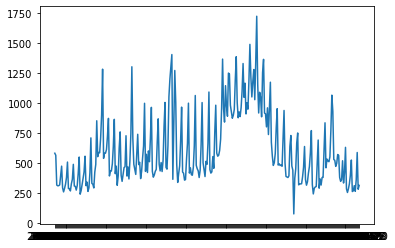

In [190]:
sub_df = df[(df["date"] >= "2021-01") & (df["date"] <= "2021-12")]
plt.plot(sub_df["date"], sub_df["Quantity"])

100%|██████████| 313/313 [00:00<00:00, 2045.52it/s]


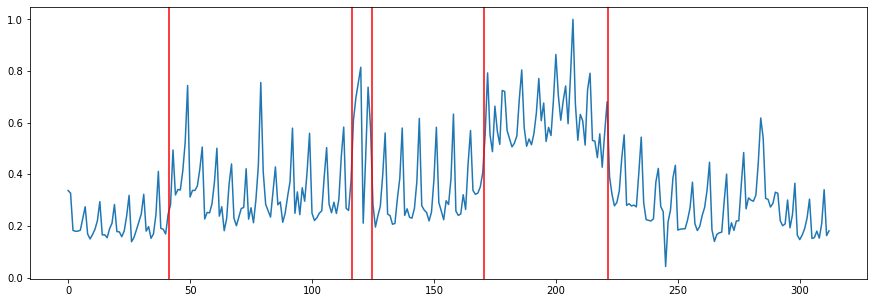

In [192]:
y = np.array(sub_df["Quantity"])
y /= np.max(y)

cp = rfpop(y, 2.5, 0.2, verbose=False)
taus = [elt[1] for elt in cp]

plt.figure(figsize=(15, 5))
bkpts = get_breakpoints(taus)
plt.plot(np.arange(len(y)), y)
for b in bkpts:
    plt.axvline(x=b+0.5, color='r')
plt.show()

## S&P 500 stock data (Kaggle)

In [198]:
path_zion = "C:\Jeremie\MVA\Machine learning for time series\ZION_data.csv"
path_aapl = "C:\Jeremie\MVA\Machine learning for time series\AAPL_data.csv"

In [199]:
df_zion = pd.read_csv(path_zion, header=0)
df_aapl = pd.read_csv(path_aapl, header=0)

In [202]:
y = np.array(df_aapl["open"])
y_deriv = [(y[i+1] - y[i]) for i in range(len(y)-1)]

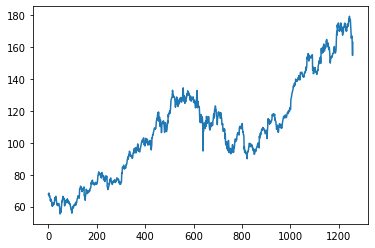

In [205]:
plt.plot(y)

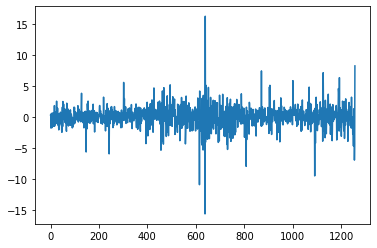

In [204]:
plt.plot(y_deriv)